# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from random import uniform
import pandas as pd
import numpy as np
import requests
from requests.exceptions import HTTPError
import matplotlib.pyplot as plt
from datetime import datetime
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# how many cities to sample 
number_of_cities = 500

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url="https://api.openweathermap.org/data/2.5/weather"
params =  {"q" : "",
             "units" : "imperial",
            "APIKEY" : api_key}

## Generate Cities List

In [13]:
# dictionary to collect at least 500 unique cities
cities_dict = {} 

# loop to add 500 cities to cities_dict
 ## extra hundred added to allow for failures
while len(cities_dict) < number_of_cities + 100:

    # generate random longitude and latitude
    long_rand = uniform(-180,180)
    lat_rand = uniform(-90, 90)

    # use citypy to get name and country of nearest city, use variables for easy code reading
    city = citipy.nearest_city(lat_rand, long_rand)
    city_name = city.city_name
    city_country = city.country_code

    # add to dictionary for ease of selecting unique values, this will not allow same city name different country
    # but is an easy method to ensure unique entries in one pass
    cities_dict[city_name] = city.country_code

# dictionary to dataframe to store city information
cities = pd.DataFrame.from_dict(cities_dict, orient='index') 
cities.reset_index(inplace=True)
cities.columns = ['City','Country']
cities['Temperature']=""
cities['Humidity']=""
cities['Cloudiness']=""
cities['Wind Speed']=""
cities['Latitude']=""
cities['Longitude']=""
cities['Time']=""

len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [16]:
# check if errors occured
failed = 0

# loop through dataframe get params to set for weather lookup
for index, row in cities.iterrows():

    # assign params to query string to send to open weather API
    params['q'] = f"{row['City']},{row['Country']}" 
    
    try:
        # collect weather data per city from Open Weather API
        response = requests.post(url, params=params)
        response_data = response.json()
        response.raise_for_status()
    except HTTPError as http_err:
        # print(f'HTTP error occurred: {http_err}')
        failed = failed + 1
        print(f"{response_data['message']} : {row['City']}, {row['Country']} was skipped.")
    except Exception as err:
        # print(f'Other error occurred: {err}')
        failed = failed + 1
        print(f"{err} : {row['City']}, {row['Country']} was skipped.")
    else:
        row['Temperature']=response_data["main"]["temp_max"]
        row['Humidity']=response_data["main"]["humidity"]
        row['Cloudiness']=response_data["clouds"]["all"]
        row['Wind Speed']=response_data["wind"]["speed"]
        row['Latitude']=response_data["coord"]["lat"]
        row['Longitude']=response_data["coord"]["lon"]
        row['Time']=response_data["dt"]
        #print(w_response_data)
        #print(w_response_data["main"]["temp"])
        print(f"{response_data['id']} : {row['City']}, {row['Country']}, has been processed")
              # wait 1+ second to exceed 60 per minute rate limit of API
    time.sleep(1.01)

if failed>0:
    cities.replace('', np.nan, inplace=True)
    cities=cities.dropna()
    print("________________________________________________________________")
    print(f"{failed} rows dropped due to error(s) retrieving data. {len(cities)} cities remaining.")
    

if len(cities) < number_of_cities:
    print("________________________________________________________________")
    print(f"Error: You requested data for {number_of_cities} but only data for {len(cities)} cities was retrieved.")
              
print("________________________________________________________________")
print(f"Weather data has been loaded for {len(cities)} cities of {number_of_cities} cities required.")

3369157 : cape town, za, has been processed
2180815 : tuatapere, nz, has been processed
2155415 : new norfolk, au, has been processed
3421719 : narsaq, gl, has been processed
3833367 : ushuaia, ar, has been processed
3985710 : cabo san lucas, mx, has been processed
5880568 : bethel, us, has been processed
1106677 : bambous virieux, mu, has been processed
3874787 : punta arenas, cl, has been processed
216449 : gandajika, cd, has been processed
5468773 : gallup, us, has been processed
2420826 : gaoual, gn, has been processed
935215 : saint-philippe, re, has been processed
city not found : sentyabrskiy, ru was skipped.
336454 : ginir, et, has been processed
2172153 : casino, au, has been processed
1337613 : kulhudhuffushi, mv, has been processed
3533462 : acapulco, mx, has been processed
2074865 : carnarvon, au, has been processed
city not found : taolanaro, mg was skipped.
3366880 : hermanus, za, has been processed
3370903 : jamestown, sh, has been processed
3372472 : vila franca do camp

515267 : beloretsk, ru, has been processed
1787599 : xingyi, cn, has been processed
2014833 : tura, ru, has been processed
2126710 : beringovskiy, ru, has been processed
2020591 : magdagachi, ru, has been processed
2267254 : lagoa, pt, has been processed
5055816 : la plata, us, has been processed
1640044 : kijang, id, has been processed
1630639 : mataram, id, has been processed
2243271 : cabinda, ao, has been processed
1734240 : labuan, my, has been processed
city not found : falealupo, ws was skipped.
779554 : honningsvag, no, has been processed
3865086 : bahia blanca, ar, has been processed
1191368 : palang, bd, has been processed
4791259 : virginia beach, us, has been processed
city not found : mwaya, tz was skipped.
3394023 : natal, br, has been processed
2077895 : alice springs, au, has been processed
city not found : tsihombe, mg was skipped.
3220791 : schwarzenberg, de, has been processed
1510689 : baykit, ru, has been processed
city not found : gat, ly was skipped.
2122090 : pe

107304 : buraydah, sa, has been processed
3936456 : lima, pe, has been processed
2012530 : zhigansk, ru, has been processed
3938531 : iberia, pe, has been processed
4470244 : havelock, us, has been processed
3905088 : san ramon, bo, has been processed
2064735 : nhulunbuy, au, has been processed
2068110 : kununurra, au, has been processed
city not found : kushmurun, kz was skipped.
2013465 : verkhoyansk, ru, has been processed
city not found : japura, br was skipped.
6096551 : pangnirtung, ca, has been processed
2065594 : mount isa, au, has been processed
1852357 : shimoda, jp, has been processed
2026160 : borogontsy, ru, has been processed
1276720 : batala, in, has been processed
1490918 : staryy nadym, ru, has been processed
479704 : uchaly, ru, has been processed
1259184 : puri, in, has been processed
3570392 : le vauclin, mq, has been processed
2031405 : erdenet, mn, has been processed
city not found : limon, cr was skipped.
2145554 : ulladulla, au, has been processed
5467328 : farm

2155562 : nelson bay, au, has been processed
4005870 : general cepeda, mx, has been processed
5847411 : kahului, us, has been processed
city not found : vaitupu, wf was skipped.
162627 : yabrud, sy, has been processed
1643837 : gorontalo, id, has been processed
2311968 : nioki, cd, has been processed
city not found : barawe, so was skipped.
2032614 : baruun-urt, mn, has been processed
city not found : tungkang, tw was skipped.
2166368 : forbes, au, has been processed
3404558 : cabedelo, br, has been processed
57289 : hargeysa, so, has been processed
3403687 : camocim, br, has been processed
3868626 : valparaiso, cl, has been processed
3486270 : anaco, ve, has been processed
1264976 : leh, in, has been processed
1078553 : ampanihy, mg, has been processed
city not found : bagotville, ca was skipped.
1244926 : hambantota, lk, has been processed
364933 : umm kaddadah, sd, has been processed
2214433 : nalut, ly, has been processed
1651591 : amahai, id, has been processed
city not found : ac

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
cities.to_csv(output_data_file, encoding='utf-8')
cities.head(10)

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Time
0,cape town,za,64.00,87.0,75.0,24.16,-33.93,18.42,1.563480e+09
1,tuatapere,nz,42.01,94.0,100.0,9.53,-46.13,167.69,1.563480e+09
2,new norfolk,au,55.99,70.0,20.0,9.17,-42.78,147.06,1.563480e+09
3,narsaq,gl,62.60,59.0,40.0,8.05,60.91,-46.05,1.563480e+09
4,ushuaia,ar,37.40,74.0,0.0,5.82,-54.81,-68.31,1.563480e+09
5,cabo san lucas,mx,98.01,55.0,5.0,9.17,22.89,-109.91,1.563480e+09
6,bethel,us,57.20,82.0,90.0,11.41,60.79,-161.76,1.563480e+09
7,bambous virieux,mu,73.40,69.0,40.0,18.34,-20.34,57.76,1.563480e+09
8,punta arenas,cl,37.40,74.0,0.0,14.99,-53.16,-70.91,1.563480e+09
9,gandajika,cd,65.03,26.0,0.0,4.41,-6.75,23.95,1.563480e+09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

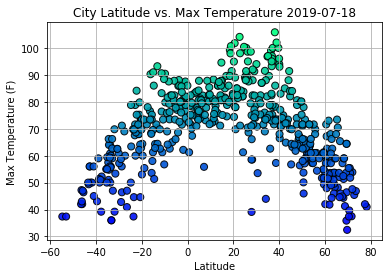

In [34]:
cm = plt.cm.get_cmap('winter')

plt.scatter(cities["Latitude"],cities["Temperature"] 
, s=50, c=cities["Temperature"], cmap=cm, alpha=.9, edgecolor="black")

plt.title(f"City Latitude vs. Max Temperature {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d')}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
          
# Save Figure
plt.savefig('latitude_temperature.png')

plt.show()

#### Latitude vs. Humidity Plot

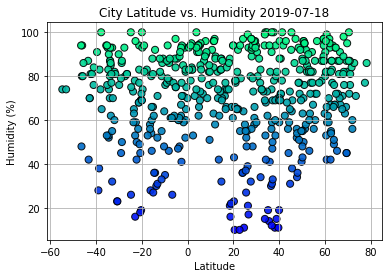

In [35]:
cm = plt.cm.get_cmap('winter')

plt.scatter(cities["Latitude"],cities["Humidity"] 
, s=50, c=cities["Humidity"], cmap=cm, alpha=.9, edgecolor="black")

plt.title(f"City Latitude vs. Humidity {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d')}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
          
# Save Figure to local dir
plt.savefig('latitude_humidity.png')
          
plt.show()

#### Latitude vs. Cloudiness Plot

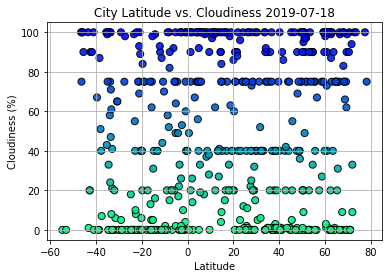

In [36]:
cm = plt.cm.get_cmap('winter')

plt.scatter(cities["Latitude"],cities["Cloudiness"] 
, s=50, c=100 - cities["Cloudiness"], cmap=cm, alpha=.9, edgecolor="black")

plt.title(f"City Latitude vs. Cloudiness {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d')}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
          
# Save Figure to local dir
plt.savefig('latitude_cloud.png')
          
plt.show()

#### Latitude vs. Wind Speed Plot

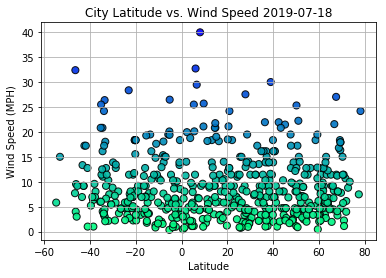

In [37]:
cm = plt.cm.get_cmap('winter')

plt.scatter(cities["Latitude"],cities["Wind Speed"] 
, s=50, c=200-cities["Wind Speed"], cmap=cm, alpha=.9, edgecolor="black")

plt.title(f"City Latitude vs. Wind Speed {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.grid()
          
# Save Figure to local dir
plt.savefig('latitude_wind.png')
          
plt.show()

Analysis:
    There is a clear correlation between latitude and temperature.  The closer you get to the equator, the warmer it is.
    There might be a correlation between wind speed and latitude (it seems like there is less wind around the equator) but the correlation is not as strong as temperature.
    Humidity does not seem to have any (or if there is some, it is small) correlation to latitude.